In [235]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_theme(style = 'whitegrid', palette ='bright', font ='cursive', font_scale = 1.4)

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [231]:
# Importing dataset

df= pd.read_csv('Data.csv')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [232]:
# Total number of null values in the dataset

df.isna().sum().sum()

0

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [234]:
# Checking trends and effects of different features on each other, through automated EDA technique "dtale".

import dtale

dtale.show(df)

In [8]:
# Splitting the data into independent & dependent variables

# Independent variables (input dataset)

# "Policy_id" is non-significant column & "is_claim" is output (dependent) column. We dropped both of them from input dataset.

X = df.drop(['policy_id', 'is_claim'], axis = 1)

X.head(3)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0


In [9]:
# Dependent variable (Output dataset)

Y = df['is_claim']
Y.shape

(58592,)

In [10]:
# Since, our input data contains both numerical & categorical features, we will do pre-processing separately for both of them.

# Checking numerical & categorical features from input dataset. 

numerical_feature = X.select_dtypes(include = ['int64','float64']).columns
print(numerical_feature)

print('**********************************************************')

categorical_feature = X.select_dtypes(include = ['object']).columns
print(categorical_feature)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating'],
      dtype='object')
**********************************************************
Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [11]:
print(f'Count of Numerical features : {len(numerical_feature)}')
print(f'Count of Categorical features : {len(categorical_feature)}')

Count of Numerical features : 15
Count of Categorical features : 27


In [12]:
# Total no. of features in input dataset

X.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

### Analysis of numerical features

In [13]:
X[numerical_feature].head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2


In [14]:
X[numerical_feature].describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000


### Observations - 
1. Considering mean & median values, we can say that there is no significant high difference between them across all columns, except for "population density".
2. From the above observation, we can conclude that there is no high variance in the data distribution.

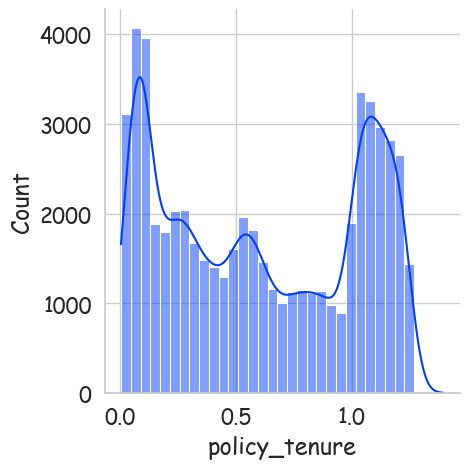

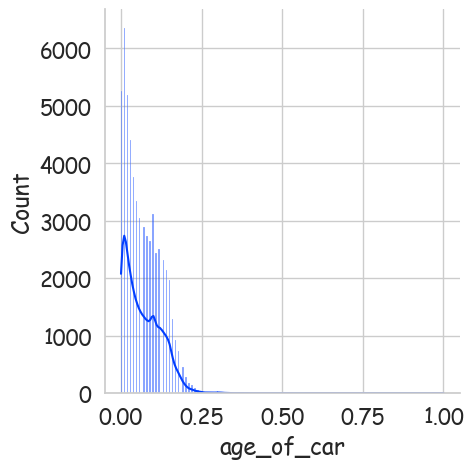

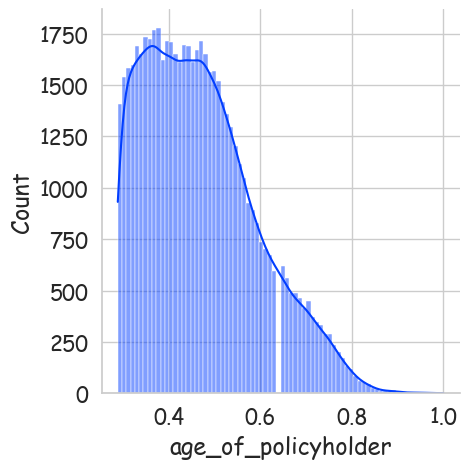

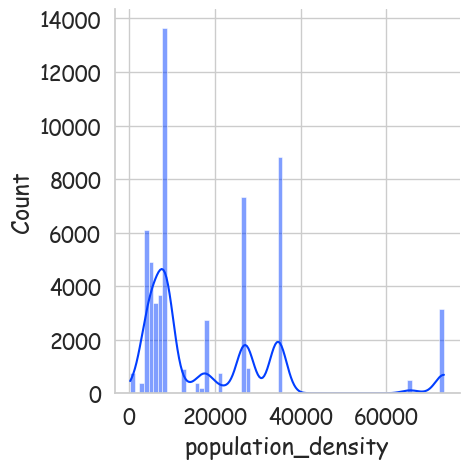

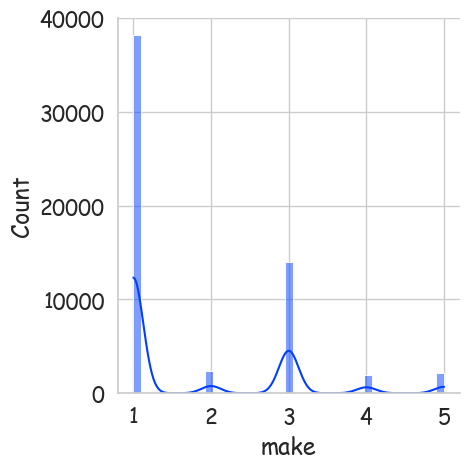

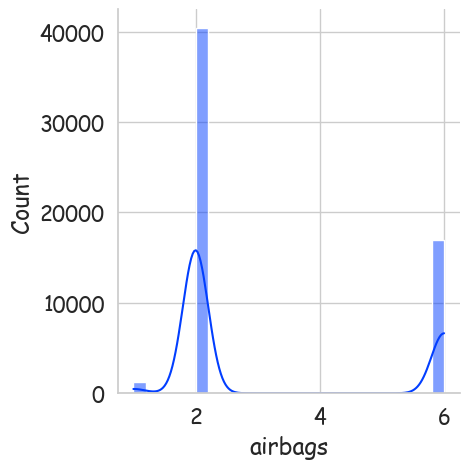

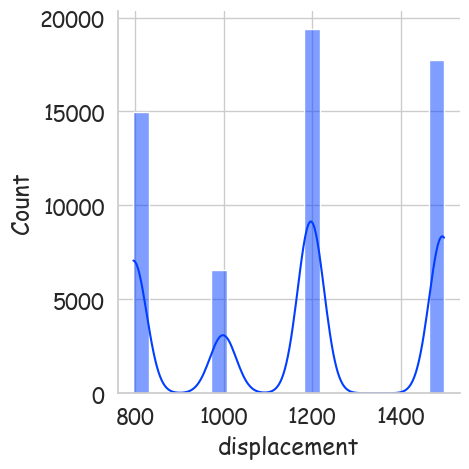

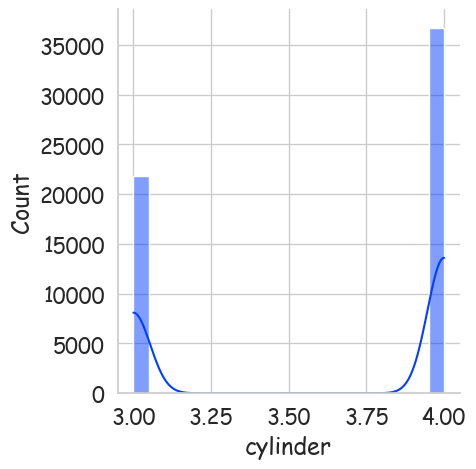

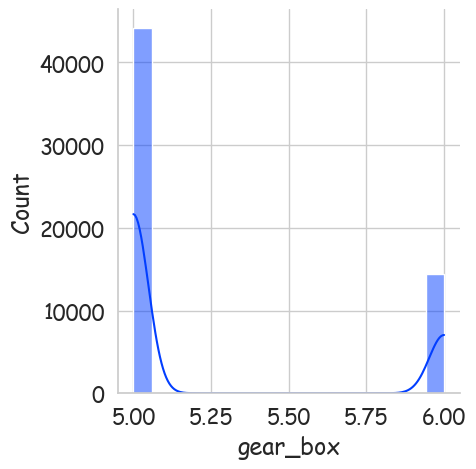

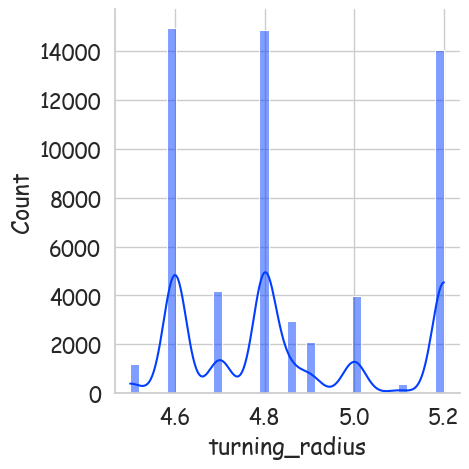

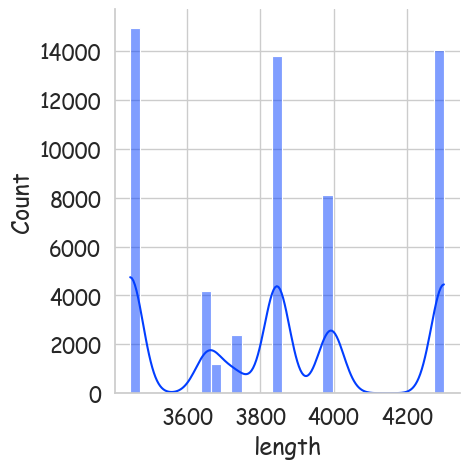

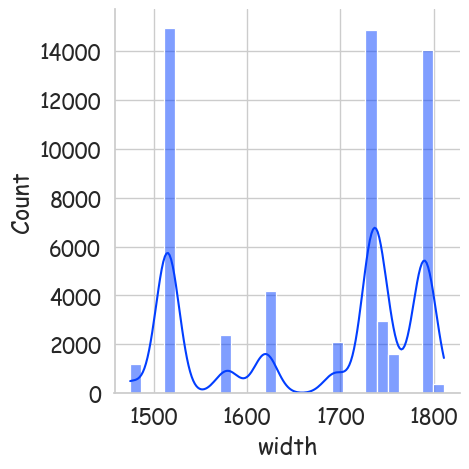

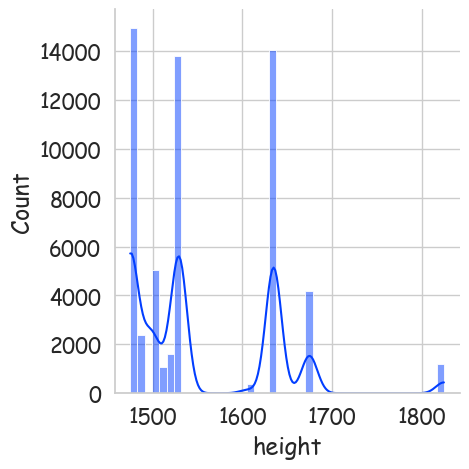

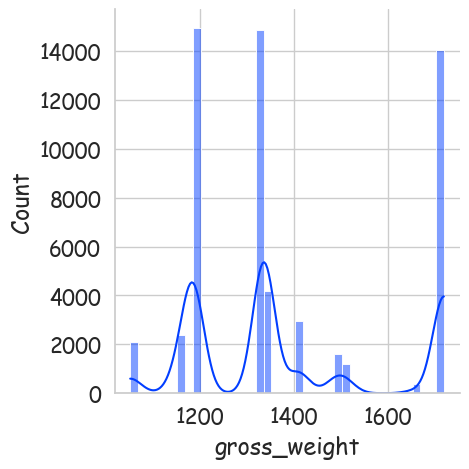

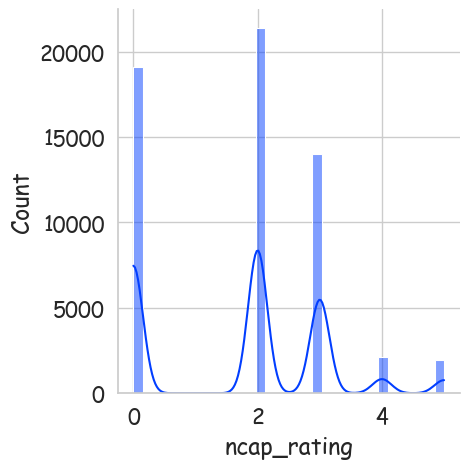

In [15]:
# Checking distribution of numerical features.

for i in numerical_feature:
    sns.displot(data = X, x =i , kde = True)
    plt.show()

### Key observations from numerical feature distributions

1. Maximum number of policies (approx. 4000) are new, followed by the policies which are 1 year old (approx. 3200).
2. Most of the insured cars (6000+) are new, that are less than 1 year old.
3. Maximum number of policy holders are young. As the age increases, number of policy holders decreases.
4. Population density is unevenly distributed as we observed from the difference between their mean & median values.
5. Maximum number of cars (nearly 40000) have 2 airbags. Around 18000 cars have 6 airbags.
6. Most of the cars have 4 cylinders – more than 35000. Around 23000 cars have 3 cylinders.
7. Approximately 44000 cars have 5 gear-box and 15000 cars have 6 gear-box.
8. Turning radius, dimensions (length, width, height) and weight of the cars are distributed depending on the company 
      of cars & their built segment.
9. Maximum number of the cars (nearly 22000) have 2 as Ncap-rating, followed by the 0 rating for around 18000 cars and 
      less than 2500 cars have 4 rating.

__“NCAP (New Car Assessment Program) rating”__ is the safety rating of the car determined after various crash tests & assessments.
Higher NCAP rating indicates better safety performance.


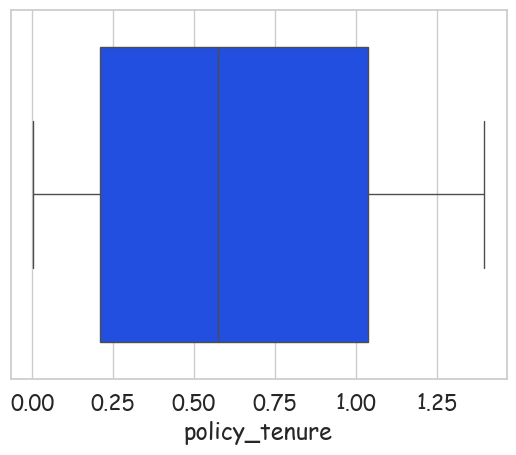

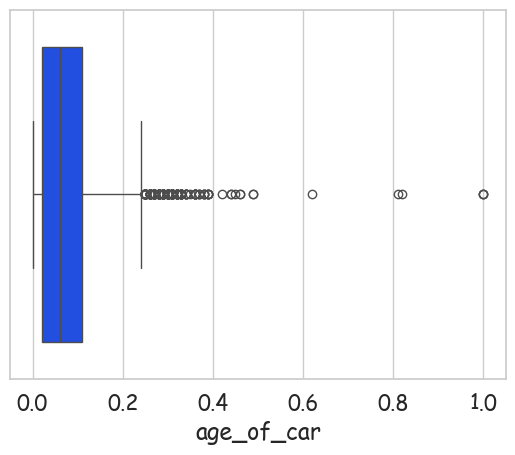

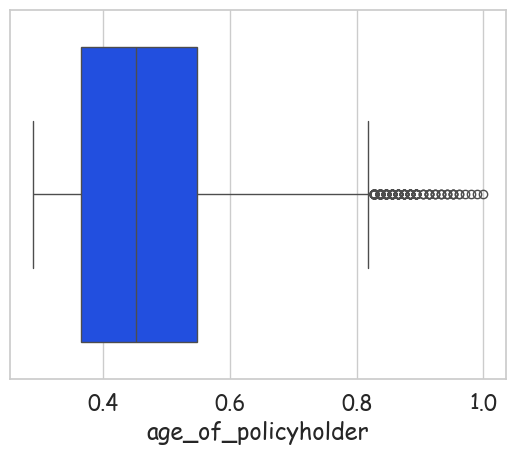

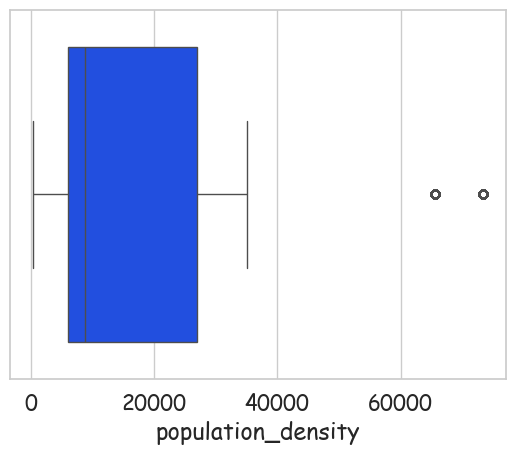

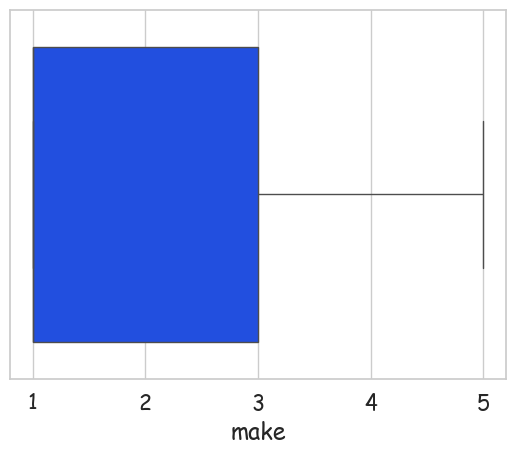

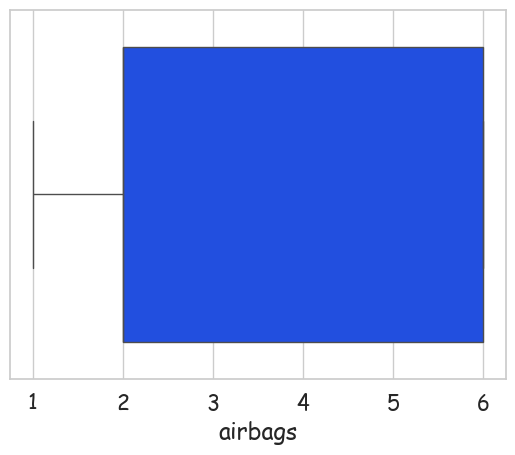

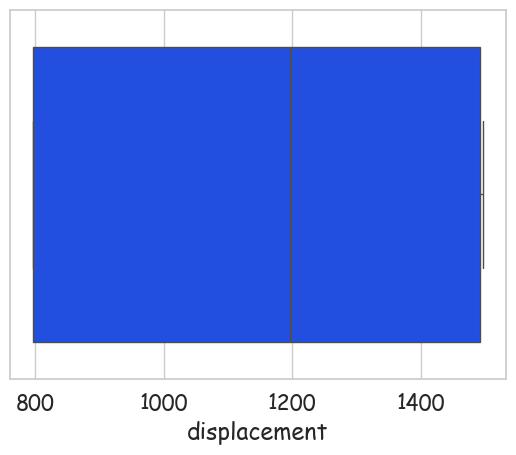

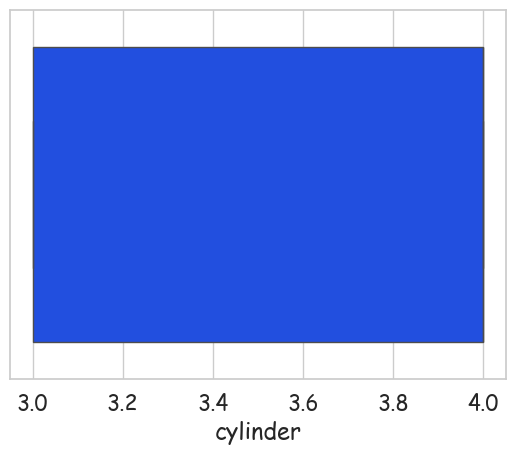

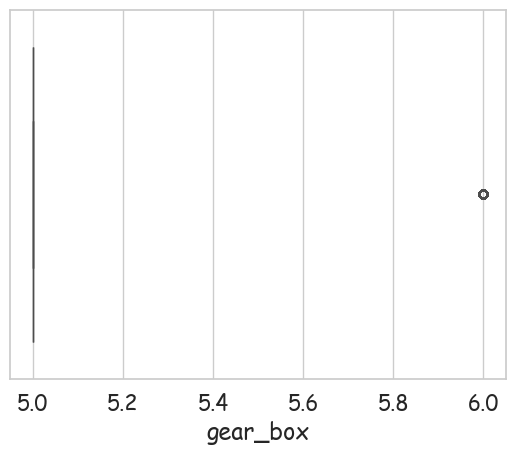

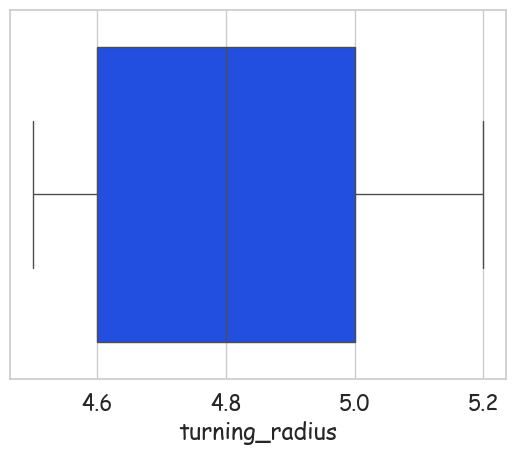

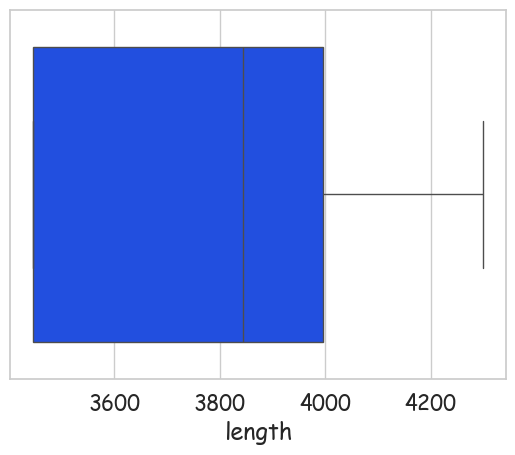

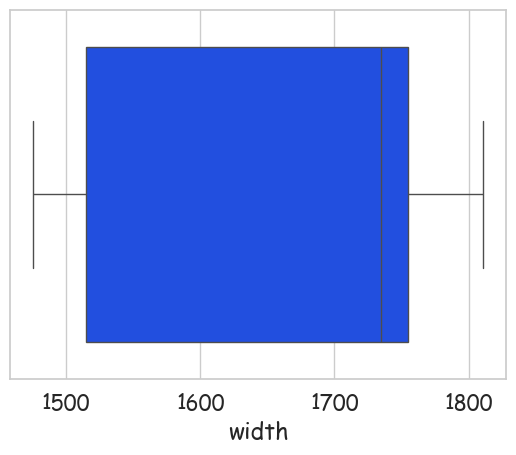

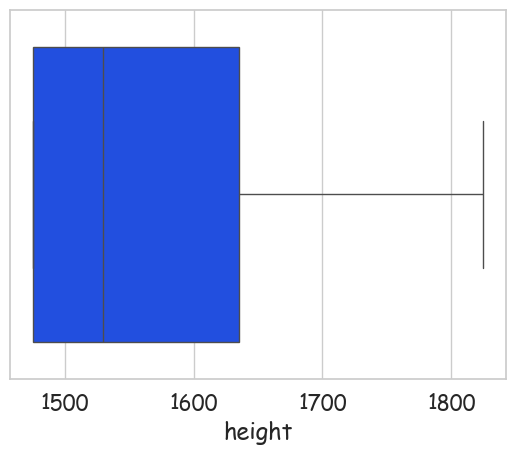

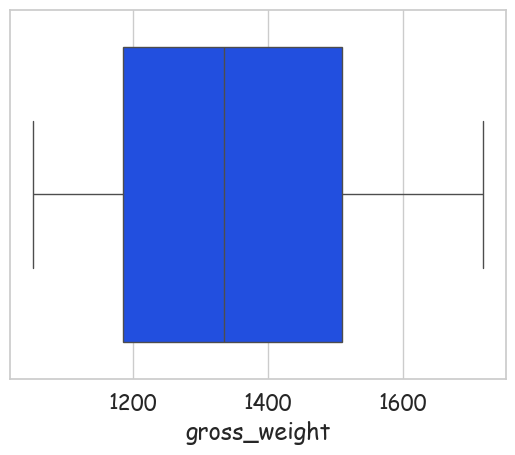

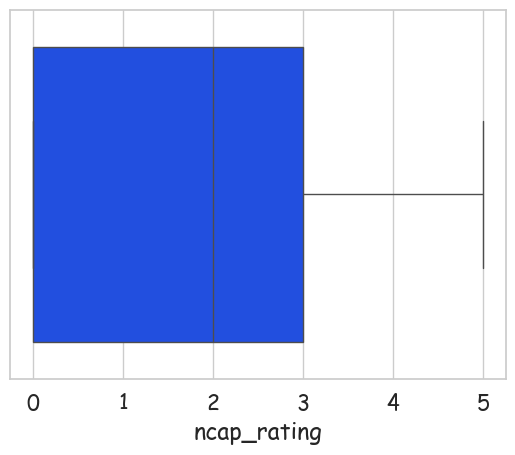

In [16]:
# Outlier checking - Ploting box plot for all i/p numerical features

for i in numerical_feature:
    sns.boxplot(data =X, x = i)
    plt.show()

In [17]:
# Checking number of outliers in each column

Q1 = X[numerical_feature].quantile(0.25)
Q3 = X[numerical_feature].quantile(0.75)
IQR = Q3-Q1

UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print('UPPER LIMIT :')
print()
print(UL)
print('*************************')
print('LOWER LIMIT :')
print()
print(LL)

UPPER LIMIT :

policy_tenure              2.282386
age_of_car                 0.245000
age_of_policyholder        0.822115
population_density     58339.500000
make                       6.000000
airbags                   12.000000
displacement            2538.500000
cylinder                   5.500000
gear_box                   5.000000
turning_radius             5.600000
length                  4820.000000
width                   2115.000000
height                  1875.000000
gross_weight            1997.500000
ncap_rating                7.500000
dtype: float64
*************************
LOWER LIMIT :

policy_tenure             -1.033032
age_of_car                -0.115000
age_of_policyholder        0.091346
population_density    -25224.500000
make                      -2.000000
airbags                   -4.000000
displacement            -249.500000
cylinder                   1.500000
gear_box                   5.000000
turning_radius             4.000000
length                  2620.

In [18]:
# Checking total number of outliers across all columns

Outliers_per_col = ((X[numerical_feature]>UL) | (X[numerical_feature]<LL)).sum()
Outliers_per_col

policy_tenure              0
age_of_car               269
age_of_policyholder      221
population_density      3647
make                       0
airbags                    0
displacement               0
cylinder                   0
gear_box               14381
turning_radius             0
length                     0
width                      0
height                     0
gross_weight               0
ncap_rating                0
dtype: int64

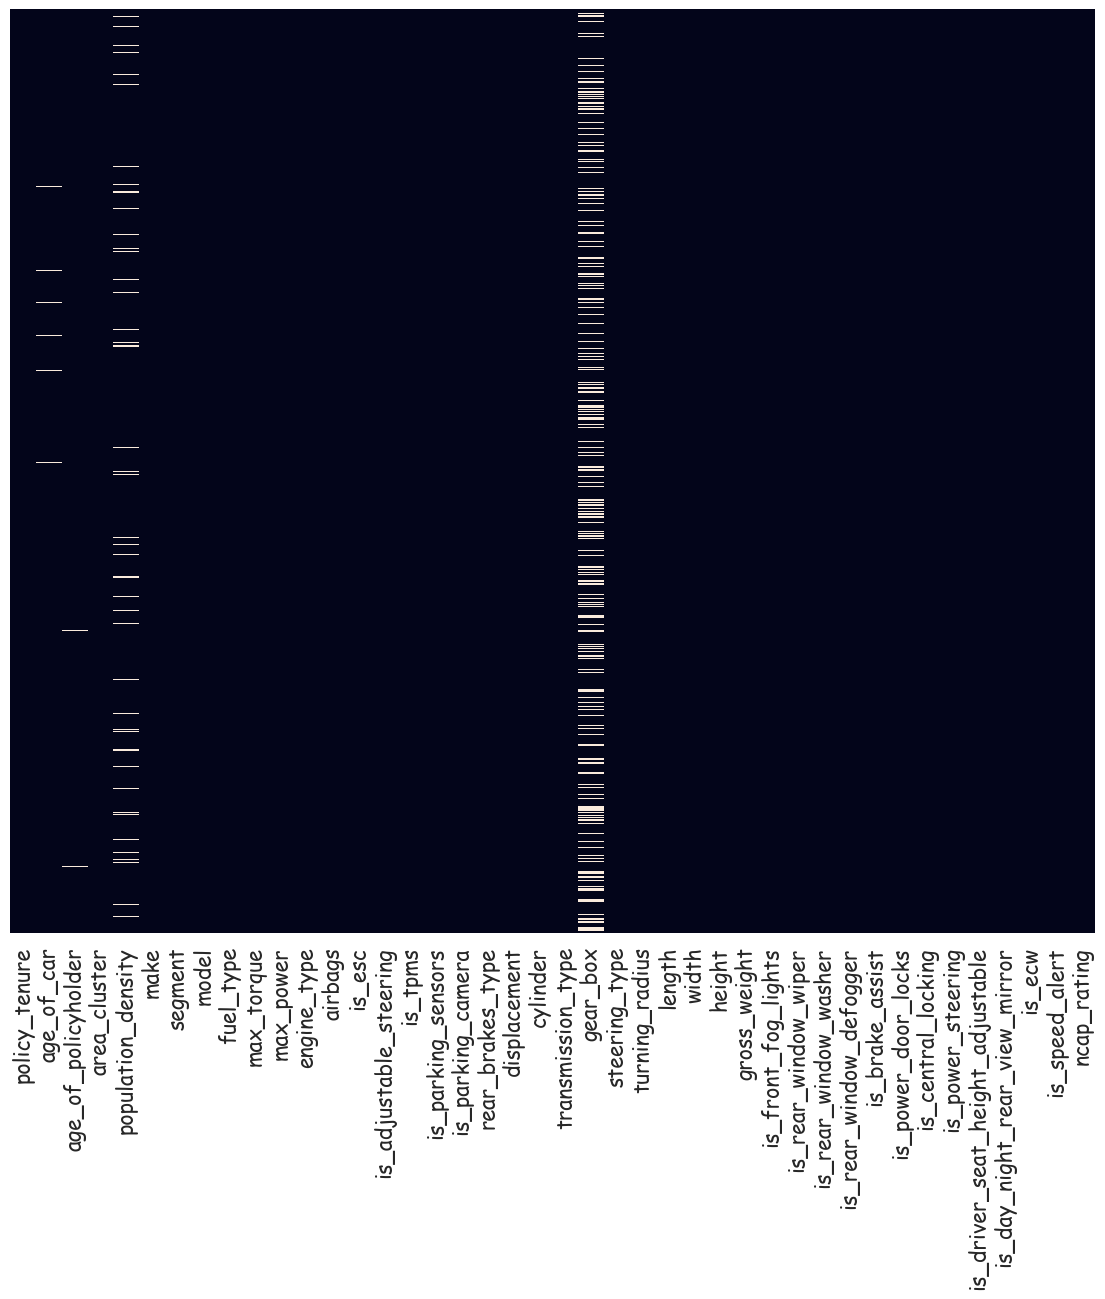

In [19]:
# Handling Outliers - Applying capping method using KNN Imputation

# Converted outlier values into NaN values

X[((X[numerical_feature]>UL) | (X[numerical_feature]<LL))] = np.NaN

# Plotting heatmap highlighting missing data, that are actually outlier values

plt.figure(figsize =(14,12))
sns.heatmap(X.isnull(), cbar=False, yticklabels = False)

plt.show()

In [20]:
# Imputing NaN values (Outlier values) using KNN (K-Nearest Neighbour) Imputer with n_neighbors = 10

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 10)
X_imputed = pd.DataFrame(imputer.fit_transform(X[numerical_feature]), columns = X[numerical_feature].columns)
X_imputed

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.515874,0.05,0.644231,4990.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
1,0.672619,0.02,0.375000,27003.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
2,0.841110,0.02,0.384615,4076.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
3,0.900277,0.11,0.432692,21622.0,1.0,2.0,1197.0,4.0,5.0,4.8,3995.0,1735.0,1515.0,1335.0,2.0
4,0.596403,0.11,0.634615,34738.0,2.0,2.0,999.0,3.0,5.0,5.0,3731.0,1579.0,1490.0,1155.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794.0,2.0,2.0,999.0,3.0,5.0,5.0,3731.0,1579.0,1490.0,1155.0,2.0
58588,1.199642,0.02,0.519231,7788.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
58589,1.162273,0.05,0.451923,34738.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
58590,1.236307,0.14,0.557692,8794.0,1.0,2.0,1197.0,4.0,5.0,4.8,3845.0,1735.0,1530.0,1335.0,2.0


In [21]:
# Checking missing values now.

X_imputed.isnull().sum().sum()           # No missing values (outliers) remaining

0

In [22]:
# All missing values (outliers) values in input numerical features have been replaced using KNN method

Outliers_per_col_updated = (((X_imputed) > UL) | ((X_imputed) < LL)).isnull().sum()
Outliers_per_col_updated

policy_tenure          0
age_of_car             0
age_of_policyholder    0
population_density     0
make                   0
airbags                0
displacement           0
cylinder               0
gear_box               0
turning_radius         0
length                 0
width                  0
height                 0
gross_weight           0
ncap_rating            0
dtype: int64

In [23]:
# Correlation analysis (using pearson correlation) - To check relationship b/w input numerial features and o/p feature

correlations = {}
for col in numerical_feature:
    corr = X[col].corr(Y, method ='pearson')
    correlations[col] = corr
    
correlations

# Using a heatmap to show correlations would have not been much interpretable, due to high no. of i/p columns

{'policy_tenure': 0.0787474476354312,
 'age_of_car': -0.02701708500655344,
 'age_of_policyholder': 0.01970380870266239,
 'population_density': -0.0048771365634451514,
 'make': -0.0004558037477077344,
 'airbags': 0.0027887938669193227,
 'displacement': 0.00767784769226518,
 'cylinder': 0.013433592933080555,
 'gear_box': nan,
 'turning_radius': 0.0027242229291588784,
 'length': 0.006494537973319089,
 'width': 0.009947051749073418,
 'height': -0.0020235341667782128,
 'gross_weight': 0.0038944029207041357,
 'ncap_rating': 0.003800070947475621}

### Since, correlation between any of the independent numerical features and dependent feature is < 0.75, therefore _"Multicollinearity"_ DOES NOT exist.

### Analysis of Categorical features in input

In [24]:
X[categorical_feature].head()

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


In [25]:
# Performing Chi-square test to check relationship b/w input categorical features and o/p feature

from scipy.stats import chi2_contingency

chi2_result = {}

for col in categorical_feature:
    contingency_table = pd.crosstab(X[col], Y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_result[col] = (chi2, p)
    
print('\nChi_square Test Results:')
print()

# Defining hypothesis-

# Null Hypothesis (Ho) - There is no significant relationship
# Alternate Hyp (Ha) - There exists a significant relationship

for key, value in chi2_result.items():
    print(f"{key}: chi2 = {value[0]:0.4f}, p-value = {value[1]:.4f}")
    if value[1] < 0.05:
        print(f"Null hypothesis is rejected. {key} has significant relationship.\n")
    else:
        print(f'Failed to reject Null hypothesis.{key} has no significant relationship\n')


Chi_square Test Results:

area_cluster: chi2 = 96.0826, p-value = 0.0000
Null hypothesis is rejected. area_cluster has significant relationship.

segment: chi2 = 12.6039, p-value = 0.0274
Null hypothesis is rejected. segment has significant relationship.

model: chi2 = 19.9750, p-value = 0.0295
Null hypothesis is rejected. model has significant relationship.

fuel_type: chi2 = 5.7596, p-value = 0.0561
Failed to reject Null hypothesis.fuel_type has no significant relationship

max_torque: chi2 = 19.3883, p-value = 0.0129
Null hypothesis is rejected. max_torque has significant relationship.

max_power: chi2 = 19.3883, p-value = 0.0129
Null hypothesis is rejected. max_power has significant relationship.

engine_type: chi2 = 19.9750, p-value = 0.0295
Null hypothesis is rejected. engine_type has significant relationship.

is_esc: chi2 = 0.4995, p-value = 0.4797
Failed to reject Null hypothesis.is_esc has no significant relationship

is_adjustable_steering: chi2 = 11.2315, p-value = 0.0008


In [26]:
# Bifurcating categorical columns having significant & non-significant relationships with o/p variable.

print('Columns having significant relationship with output variable: \n')

for key, value in chi2_result.items():
     if value[1] < 0.05:
            print(f'{key}')

print('*************************************************')

print('Columns with no significant relationship : \n')

for key, value in chi2_result.items():
     if value[1] > 0.05:
            print(f'{key}')

Columns having significant relationship with output variable: 

area_cluster
segment
model
max_torque
max_power
engine_type
is_adjustable_steering
is_parking_sensors
is_front_fog_lights
is_brake_assist
is_driver_seat_height_adjustable
*************************************************
Columns with no significant relationship : 

fuel_type
is_esc
is_tpms
is_parking_camera
rear_brakes_type
transmission_type
steering_type
is_rear_window_wiper
is_rear_window_washer
is_rear_window_defogger
is_power_door_locks
is_central_locking
is_power_steering
is_day_night_rear_view_mirror
is_ecw
is_speed_alert


#### 1. We have an option to drop those categorical columns from input dataset, which have no significant relationship with output variable.
#### 2. But we will not drop them, considering that they may not have significant impact, but must be having some effect on dependent variable depending on _"how high the p value is from 0.05"_, so dropping such colums is not recommended. They will not have much impact on classification, being not significant features.

In [27]:
# Input dataset - with updated numerical features

X[numerical_feature] = X_imputed
X.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990.0,1.0,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0
1,0.672619,0.02,0.375000,C2,27003.0,1.0,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0
2,0.841110,0.02,0.384615,C3,4076.0,1.0,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0
3,0.900277,0.11,0.432692,C4,21622.0,1.0,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2.0
4,0.596403,0.11,0.634615,C5,34738.0,2.0,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2.0


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  float64
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [29]:
# Numerical features in X

X_num = X_imputed
X_num

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.515874,0.05,0.644231,4990.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
1,0.672619,0.02,0.375000,27003.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
2,0.841110,0.02,0.384615,4076.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
3,0.900277,0.11,0.432692,21622.0,1.0,2.0,1197.0,4.0,5.0,4.8,3995.0,1735.0,1515.0,1335.0,2.0
4,0.596403,0.11,0.634615,34738.0,2.0,2.0,999.0,3.0,5.0,5.0,3731.0,1579.0,1490.0,1155.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794.0,2.0,2.0,999.0,3.0,5.0,5.0,3731.0,1579.0,1490.0,1155.0,2.0
58588,1.199642,0.02,0.519231,7788.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
58589,1.162273,0.05,0.451923,34738.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
58590,1.236307,0.14,0.557692,8794.0,1.0,2.0,1197.0,4.0,5.0,4.8,3845.0,1735.0,1530.0,1335.0,2.0


In [30]:
# Categorical features in X

X_cat = X[categorical_feature]
X_cat

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [31]:
X_num_features = X_num.columns
print(X_num_features)

print()

X_cat_features = X_cat.columns
print(X_cat_features)

print()

X_total_features = X.columns
print(X_total_features)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating'],
      dtype='object')

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'mo

### Creating a column transformer - to convert input dataset into numerical values.

by applying feature scaling (Standardization method) on i/p numerical features & One hot Encoding on i/p categorical features

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [33]:
preprocessor = ColumnTransformer(transformers= [('num', StandardScaler(), X_num_features), 
                                                ('cat', OneHotEncoder(sparse_output=False), X_cat_features)])

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating'],
      dtype='object')),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 Index(['area_cluster', 'segmen...
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object'))])

In [34]:
# Updated input dataset

preprocessor.set_output(transform ='pandas')   # "set_output() - converts numpy array o/p of Column Transformer into Pandas Df

X_new = preprocessor.fit_transform(X)
X_new

,num__policy_tenure,num__age_of_car,num__age_of_policyholder,num__population_density,num__make,num__airbags,num__displacement,num__cylinder,num__gear_box,num__turning_radius,...,cat__is_power_steering_No,cat__is_power_steering_Yes,cat__is_driver_seat_height_adjustable_No,cat__is_driver_seat_height_adjustable_Yes,cat__is_day_night_rear_view_mirror_No,cat__is_day_night_rear_view_mirror_Yes,cat__is_ecw_No,cat__is_ecw_Yes,cat__is_speed_alert_No,cat__is_speed_alert_Yes
0,-0.230283,-0.341038,1.461875,-0.932806,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.148188,-0.897105,-0.771575,1.058375,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.555022,-0.897105,-0.691809,-1.015482,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.697883,0.771096,-0.292979,0.571638,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.035840,0.771096,1.382109,1.758042,0.207812,-0.620458,-0.613422,-1.296417,0.0,0.645040,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,-0.618508,1.141808,1.461875,-0.588716,0.207812,-0.620458,-0.613422,-1.296417,0.0,0.645040,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
58588,1.420720,-0.897105,0.424916,-0.679714,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
58589,1.330490,-0.341038,-0.133446,1.758042,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
58590,1.509251,1.327163,0.743981,-0.588716,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [35]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Columns: 127 entries, num__policy_tenure to cat__is_speed_alert_Yes
dtypes: float64(127)
memory usage: 56.8 MB


In [36]:
# O/p data

Y = df['is_claim']
Y.value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

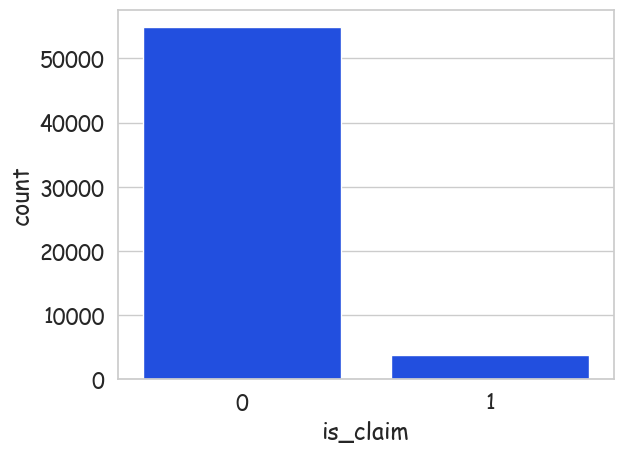

In [37]:
sns.countplot(x = Y)
plt.show()

### 1. There is a high class imbalance in output features.

### 2. Therefore, we need to deal with imbalance issue first to proceed further for model building.

### Effects of data imbalance

1. __Skewed Class Distribution__ - In case of dataset imbalance, the minority class is significantly underrepresented compared to the majority class in a classification problem. This can skew the model’s learning process leading to poor performance on the minority class.
2. __Biased Model Training__ - In imbalanced datasets, a model achieves high accuracy by simply predicting the majority class for all instances, ignoring the minority class completely. As a result, the model is biased towards the majority class & fails to capture patterns in the minority class accurately.
3. __Poor Generalization__ - Since the model hasn’t learned enough about the minority class due to its scarcity in the training data, it may struggle to make accurate predictions for instances belonging to that class in real-world scenarios.
4. __Evaluation Metrics Misleading__ - Traditional evaluation metrics like __"accuracy"__ can be _misleading_ in imbalanced datasets, since a model achieving high accuracy may perform poorly on the minority class, which is often the class of interest. Using metrics like __"precision, recall, F1-score, or area under the ROC curve (AUC-ROC)"__ can provide a better understanding of the model’s performance across different classes.

In [219]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, train_size = 0.80, random_state = 42, stratify = Y)

# We stratified output data (Y), in order to deal with imbalancing in dependent features.

## Checking performance of different models _"without fixing data imbalance"_ issue

### So, now we'll consider different algorithms to compare their performances & choose the best model.

In [39]:
# We will consider following Algorithms for determining the claim status - 

# 1. Logistic Regression
# 2. Support Vector Machine
# 3. Naive Bayes
# 4. Decision Tree
# 5. Random Forest
# 6. Gradient Boosting
# 7. ADA Boosting

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score

In [41]:
# Defining a function to check different parameters for a model

def classify(model):
    print(f'Model name: {model}')
    model.fit(X_train, y_train)
    print(f'Train Accuracy: {model.score(X_train, y_train)}')
    y_pred = model.predict(X_test)
    print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
    print()
    print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
    print()
    print(f'Classification Report: \n {classification_report(y_test, y_pred)}')
    print()
    print(f'Roc-auc-score: {roc_auc_score(y_test,y_pred)}')

### 1. Logistic Regression

In [42]:
classify(LogisticRegression())

Model name: LogisticRegression()
Train Accuracy: 0.9360399377040087
Test Accuracy: 0.9360013653042069

Confusion Matrix: 
 [[10969     0]
 [  750     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719


Roc-auc-score: 0.5


### Observations with effects of data imbalance issue - 
1. __Logistic Regression__ is considering only one class & not making prediction about another class, acc to confusion matrix.
2. Its showing nearly similar accuracy scores for both training & testing datasets.
3. Roc-auc-score as 50%, which implies its on the boundary of being a good or bad model. (_"not considered"_ as a recommended score for final model.)

### 2. Support Vector Machine

In [43]:
classify(SVC())

Model name: SVC()
Train Accuracy: 0.9360399377040087
Test Accuracy: 0.9360013653042069

Confusion Matrix: 
 [[10969     0]
 [  750     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719


Roc-auc-score: 0.5


### Observations with effects of data imbalance issue - 
1. __Support Vector Machine__ is considering only one class & not making prediction about another class, acc to confusion matrix.
2. Its showing nearly similar accuracy scores for both training & testing datasets.
3. Roc-auc-score as 50%, which implies its on the boundary of being a good or bad model. (_"not considered"_ as a recommended score for final model.)

### 3. Naive Bayes

In [44]:
classify(GaussianNB())

Model name: GaussianNB()
Train Accuracy: 0.6030977321699059
Test Accuracy: 0.5987712262138408

Confusion Matrix: 
 [[6686 4283]
 [ 419  331]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.61      0.74     10969
           1       0.07      0.44      0.12       750

    accuracy                           0.60     11719
   macro avg       0.51      0.53      0.43     11719
weighted avg       0.89      0.60      0.70     11719


Roc-auc-score: 0.5254346491627921


### Observations with effects of data imbalance issue - 
1. __Naive Bayes__ considered both the classes, according to confusion matrix.
2. Its showing nearly similar accuracy scores for both training & testing datasets.
3. Roc-auc-score as sligjtly above 50%, which implies model is towards the possiblity of being a good model. (_"not considered"_ as a low recommended score)

### 4. Decision Tree Classifier

In [45]:
classify(DecisionTreeClassifier())

Model name: DecisionTreeClassifier()
Train Accuracy: 1.0
Test Accuracy: 0.87251471968598

Confusion Matrix: 
 [[10164   805]
 [  689    61]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10969
           1       0.07      0.08      0.08       750

    accuracy                           0.87     11719
   macro avg       0.50      0.50      0.50     11719
weighted avg       0.88      0.87      0.88     11719


Roc-auc-score: 0.5039723463092959


In [46]:
# Cross validating Decision Tree, since it's providing 100% training accuracy

from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")   # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.87253333 0.87306667 0.87136    0.87241306 0.87508001]
Mean accuracy: 0.8728906131854064
Standard deviation: 0.001226615830068563


### Observations with effects of data imbalance issue - 
1. __Decision Tree Classifier__ considered both the classes, according to confusion matrix.
2. Training accuracy is 100% & testing accuracy is 88%. This implies model is overfitting.
3. Roc-auc-score as 50%, which implies its on the boundary of being a good or bad model. (_"not considered"_ as a recommended score for final model.)
4. As per __cross-validation__, training accuracy (mean) is 87%, which is a considerable drop from 100% and confirms that model is overfitting.

### 5. Random Forest Classifier

In [47]:
classify(RandomForestClassifier())

Model name: RandomForestClassifier()
Train Accuracy: 0.999786657564056
Test Accuracy: 0.9308814745285434

Confusion Matrix: 
 [[10903    66]
 [  744     6]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     10969
           1       0.08      0.01      0.01       750

    accuracy                           0.93     11719
   macro avg       0.51      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719


Roc-auc-score: 0.5009915215607621


In [48]:
# Cross validating Random Forest for overfitting, since model is providing 99% training accuracy

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.9312     0.93098667 0.93088    0.93129934 0.93172605]
Mean cross-validation score: 0.9312184112083066
Standard deviation: 0.0002942155083119151


### Observations with effects of data imbalance issue - 
1. __Random Forest Classifier__ considered both the classes, according to confusion matrix.
2. Training accuracy is 99% and testing accuracy is 93%. This implies that our model is overfitting.
3. Roc-auc-score = 50%, which implies its at the boundary line of being a good or bad model.
4. As per __cross-validation__ findings, the training accuracy (mean) is 93%, which is equal to test accuracy.

In [49]:
# Random Forest Classifier with max depth (calculated) and n-estimators as 100 (assumed).

no_of_features = len(X_train.columns)
print(no_of_features)
print()

depth = int(np.log2(no_of_features))
print(depth)

127

6


In [50]:
classify(RandomForestClassifier(n_estimators= 100, max_depth= depth, random_state= 101))

Model name: RandomForestClassifier(max_depth=6, random_state=101)
Train Accuracy: 0.9360399377040087
Test Accuracy: 0.9360013653042069

Confusion Matrix: 
 [[10969     0]
 [  750     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719


Roc-auc-score: 0.5


### 6. Gradient Boosting

In [51]:
classify(GradientBoostingClassifier())

Model name: GradientBoostingClassifier()
Train Accuracy: 0.9362319458963583
Test Accuracy: 0.9358307022783514

Confusion Matrix: 
 [[10967     2]
 [  750     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719


Roc-auc-score: 0.4999088339866898


### Observations with effects of data imbalance issue - 
1. __Gradient Boosting__ considered both classes for prediction, according to confusion matrix.
2. Training and testing accuracies are similar as approx 93%.
3. Roc-auc-score as < 50%, which implies its a bad model. (_"not considered"_ as a recommended score for model building.)

### 7. Ada Boosting

In [52]:
classify(AdaBoostClassifier())

Model name: AdaBoostClassifier()
Train Accuracy: 0.9360399377040087
Test Accuracy: 0.9360013653042069

Confusion Matrix: 
 [[10969     0]
 [  750     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719


Roc-auc-score: 0.5


### Observations with effects of data imbalance issue - 
1. __Gradient Boosting__ considered both classes for prediction, according to confusion matrix.
2. Training and testing accuracies are similar as approx 93%.
3. Roc-auc-score as = 50%, which implies that model is at boundary of being a good or bad model. (_"not considered"_ as a recommended score for model building.)

### In all the models, _"roc_auc_score"_ is not coming sufficiently high due to data imbalancing.

### Therefore, we'll fix the imbalance issue first before creating model.

In [53]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, train_size = 0.80, random_state = 42, stratify = Y)

### Using SMOTE (Synthetic Minority Oversampling Technique) technique
SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [198]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
sm = SMOTE(sampling_strategy= 0.8, random_state=42)   # Keeping ratio of minority class to majority class as 0.8, instead of 0.5

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 43875, 1: 2998})
After Counter({0: 43875, 1: 35100})


In [129]:
# Updated input training dataset after resampling

X_train_updated = pd.concat([X_train_sm, y_train_sm], axis = 1)
X_train_updated.head()

,num__policy_tenure,num__age_of_car,num__age_of_policyholder,num__population_density,num__make,num__airbags,num__displacement,num__cylinder,num__gear_box,num__turning_radius,...,cat__is_power_steering_Yes,cat__is_driver_seat_height_adjustable_No,cat__is_driver_seat_height_adjustable_Yes,cat__is_day_night_rear_view_mirror_No,cat__is_day_night_rear_view_mirror_Yes,cat__is_ecw_No,cat__is_ecw_Yes,cat__is_speed_alert_No,cat__is_speed_alert_Yes,is_claim
0,-0.767652,2.068586,0.026086,1.758042,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,-0.525558,0.400385,-1.090640,-0.894815,-0.671712,-0.620458,-0.617177,-1.296417,0.0,-0.670410,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
2,1.104859,-0.711749,1.142811,-0.588716,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,-0.019526,0.215029,1.461875,1.758042,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,0.528986,-1.082460,0.504682,-0.894815,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0


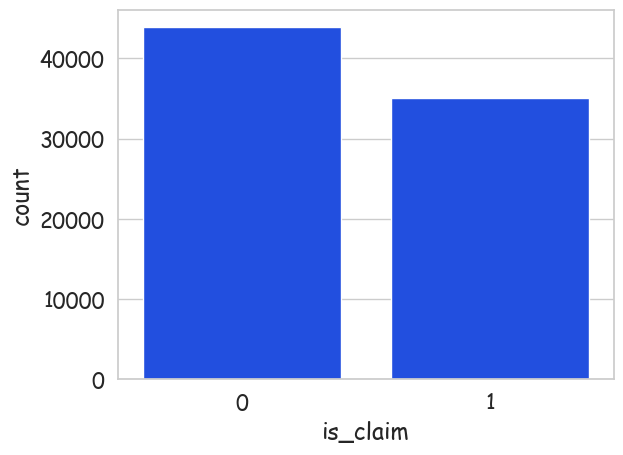

In [136]:
sns.countplot(x = X_train_updated['is_claim'])

plt.show()

### Defining the model function again using _"X_train_sm"_ and _"y_train_sm"_

In [158]:
def classify(model):
    print(f'Model name: {model}')
    model.fit(X_train_sm, y_train_sm)
    print(f'Train Accuracy: {model.score(X_train_sm, y_train_sm)}')
    y_pred = model.predict(X_test)
    print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
    print()
    print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
    print()
    print(f'Classification Report: \n {classification_report(y_test, y_pred)}')
    print()
    print(f'Roc-auc-score: {roc_auc_score(y_test,y_pred)}')
    

### 1. Logistic Regression

In [56]:
# At 100% distribution of majority and monority classes both after resampling (default resampling distribution)

classify(LogisticRegression())

Model name: LogisticRegression()
Train Accuracy: 0.5936068376068376
Test Accuracy: 0.5746224080552949

Confusion Matrix: 
 [[6340 4629]
 [ 356  394]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.58      0.72     10969
           1       0.08      0.53      0.14       750

    accuracy                           0.57     11719
   macro avg       0.51      0.55      0.43     11719
weighted avg       0.89      0.57      0.68     11719


Roc-auc-score: 0.5516629288601209


In [108]:
# When majority class is 100% and minority class is 80% after resampling

classify(LogisticRegression())

Model name: LogisticRegression()
Train Accuracy: 0.5933270022158911
Test Accuracy: 0.696134482464374

Confusion Matrix: 
 [[7867 3102]
 [ 459  291]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.72      0.82     10969
           1       0.09      0.39      0.14       750

    accuracy                           0.70     11719
   macro avg       0.52      0.55      0.48     11719
weighted avg       0.89      0.70      0.77     11719


Roc-auc-score: 0.5526015133558209


In [143]:
# When majority class is 100% and minority class is 70% after resampling

classify(LogisticRegression())

Model name: LogisticRegression()
Train Accuracy: 0.6055076621931436
Test Accuracy: 0.7697755781210001

Confusion Matrix: 
 [[8814 2155]
 [ 543  207]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.80      0.87     10969
           1       0.09      0.28      0.13       750

    accuracy                           0.77     11719
   macro avg       0.51      0.54      0.50     11719
weighted avg       0.89      0.77      0.82     11719


Roc-auc-score: 0.5397686206582186


In [139]:
# When majority class is 100% and minority class is 60% after resampling

classify(LogisticRegression())

Model name: LogisticRegression()
Train Accuracy: 0.6285897435897436
Test Accuracy: 0.8425633586483489

Confusion Matrix: 
 [[9752 1217]
 [ 628  122]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     10969
           1       0.09      0.16      0.12       750

    accuracy                           0.84     11719
   macro avg       0.52      0.53      0.52     11719
weighted avg       0.89      0.84      0.86     11719


Roc-auc-score: 0.5258588142340536


### Observations -

#### 1. roc-score is getting reduced as minority class composition is decreasing. 
#### 2. Best Roc-score our model achieved is at default resampling distribution.

### 2. Support Vector Machine

In [ ]:
# At 100% distribution of majority and monority classes after resampling (default resampling distribution)

classify(SVC())

In [199]:
# When majority class is 100% and minority class is 80% after resampling

classify(SVC())

Model name: SVC()
Train Accuracy: 0.6454447610003166
Test Accuracy: 0.6444235856301732

Confusion Matrix: 
 [[7182 3787]
 [ 380  370]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.65      0.78     10969
           1       0.09      0.49      0.15       750

    accuracy                           0.64     11719
   macro avg       0.52      0.57      0.46     11719
weighted avg       0.89      0.64      0.74     11719


Roc-auc-score: 0.5740438204637311


### 3. Naive Bayes

In [111]:
# At 100% distribution of majority and monority classes both after resampling (default resampling distribution)

classify(GaussianNB())

Model name: GaussianNB()
Train Accuracy: 0.540911680911681
Test Accuracy: 0.3388514378359928

Confusion Matrix: 
 [[3444 7525]
 [ 223  527]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.31      0.47     10969
           1       0.07      0.70      0.12       750

    accuracy                           0.34     11719
   macro avg       0.50      0.51      0.30     11719
weighted avg       0.88      0.34      0.45     11719


Roc-auc-score: 0.5083212082535631


In [109]:
# When majority class is 100% and minority class is 80% after resampling

classify(GaussianNB())

Model name: GaussianNB()
Train Accuracy: 0.5179360557138335
Test Accuracy: 0.3439713286116563

Confusion Matrix: 
 [[3511 7458]
 [ 230  520]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.32      0.48     10969
           1       0.07      0.69      0.12       750

    accuracy                           0.34     11719
   macro avg       0.50      0.51      0.30     11719
weighted avg       0.88      0.34      0.45     11719


Roc-auc-score: 0.5067086030327893


### 4. Decision Tree Classifier

In [59]:
# At 100% distribution of majority and monority classes both after resampling (default resampling distribution)

classify(DecisionTreeClassifier())

Model name: DecisionTreeClassifier()
Train Accuracy: 1.0
Test Accuracy: 0.8506698523764826

Confusion Matrix: 
 [[9873 1096]
 [ 654   96]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     10969
           1       0.08      0.13      0.10       750

    accuracy                           0.85     11719
   macro avg       0.51      0.51      0.51     11719
weighted avg       0.88      0.85      0.87     11719


Roc-auc-score: 0.5140410247059897


In [102]:
# When majority class is 100% and minority class is 80% after resampling

classify(DecisionTreeClassifier())

Model name: DecisionTreeClassifier()
Train Accuracy: 1.0
Test Accuracy: 0.854595101971158

Confusion Matrix: 
 [[9925 1044]
 [ 660   90]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     10969
           1       0.08      0.12      0.10       750

    accuracy                           0.85     11719
   macro avg       0.51      0.51      0.51     11719
weighted avg       0.88      0.85      0.87     11719


Roc-auc-score: 0.5124113410520559


#### Cross validating Decision Tree for overfitting

In [120]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train_sm, y_train_sm, cv=5, scoring="accuracy")   # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.82063944 0.91282051 0.90870529 0.9099082  0.91237733]
Mean accuracy: 0.8928901551123773
Standard deviation: 0.03615761865665878


### 5. Random Forest Classifier

In [61]:
# At 100% distribution of majority and monority classes both after resampling (default resampling distribution)

classify(RandomForestClassifier())

Model name: RandomForestClassifier()
Train Accuracy: 1.0
Test Accuracy: 0.8673094973973888

Confusion Matrix: 
 [[10082   887]
 [  668    82]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     10969
           1       0.08      0.11      0.10       750

    accuracy                           0.87     11719
   macro avg       0.51      0.51      0.51     11719
weighted avg       0.88      0.87      0.88     11719


Roc-auc-score: 0.5142345397635761


In [114]:
# When majority class is 100% and minority class is 80% after resampling

classify(RandomForestClassifier())

Model name: RandomForestClassifier()
Train Accuracy: 0.9999746755302311
Test Accuracy: 0.87251471968598

Confusion Matrix: 
 [[10147   822]
 [  672    78]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10969
           1       0.09      0.10      0.09       750

    accuracy                           0.87     11719
   macro avg       0.51      0.51      0.51     11719
weighted avg       0.88      0.87      0.88     11719


Roc-auc-score: 0.5145307685294922


In [151]:
# When majority class is 100% and minority class is 70% after resampling

classify(RandomForestClassifier())

Model name: RandomForestClassifier()
Train Accuracy: 1.0
Test Accuracy: 0.8773786159228603

Confusion Matrix: 
 [[10213   756]
 [  681    69]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10969
           1       0.08      0.09      0.09       750

    accuracy                           0.88     11719
   macro avg       0.51      0.51      0.51     11719
weighted avg       0.88      0.88      0.88     11719


Roc-auc-score: 0.5115392469687301


In [149]:
# When majority class is 100% and minority class is 60% after resampling

classify(RandomForestClassifier())

Model name: RandomForestClassifier()
Train Accuracy: 1.0
Test Accuracy: 0.8835224848536565

Confusion Matrix: 
 [[10291   678]
 [  687    63]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10969
           1       0.09      0.08      0.08       750

    accuracy                           0.88     11719
   macro avg       0.51      0.51      0.51     11719
weighted avg       0.88      0.88      0.88     11719


Roc-auc-score: 0.5110947214878293


#### Cross validating Random Forest for overfitting

In [119]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(rf, X_train_sm, y_train_sm, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.85508072 0.91801203 0.92225388 0.92022792 0.92143083]
Mean cross-validation score: 0.9074010762899652
Standard deviation: 0.026199158453523292


#### Random Forest Classifier with max depth (calculated) and n-estimators as 100 (default assumed value).

In [63]:
# Calculating the number of input features

no_of_features = len(X_train_sm.columns)
print(no_of_features)
print()


# Calculating max-depth

depth = int(np.log2(no_of_features))
print(depth)

127

6


In [64]:
# At 100% distribution of majority and monority classes both after resampling (default resampling distribution)

classify(RandomForestClassifier(n_estimators= 100, max_depth= depth, random_state= 101))

Model name: RandomForestClassifier(max_depth=6, random_state=101)
Train Accuracy: 0.6889002849002849
Test Accuracy: 0.6213840771396877

Confusion Matrix: 
 [[6844 4125]
 [ 312  438]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.62      0.76     10969
           1       0.10      0.58      0.16       750

    accuracy                           0.62     11719
   macro avg       0.53      0.60      0.46     11719
weighted avg       0.90      0.62      0.72     11719


Roc-auc-score: 0.6039700975476343


In [116]:
# When majority class is 100% and minority class is 80% after resampling

classify(RandomForestClassifier(n_estimators=100, max_depth =depth, random_state =42))

Model name: RandomForestClassifier(max_depth=6, random_state=42)
Train Accuracy: 0.6503197214308325
Test Accuracy: 0.8535711238160253

Confusion Matrix: 
 [[9850 1119]
 [ 597  153]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     10969
           1       0.12      0.20      0.15       750

    accuracy                           0.85     11719
   macro avg       0.53      0.55      0.54     11719
weighted avg       0.89      0.85      0.87     11719


Roc-auc-score: 0.5509926155529219


In [153]:
# When majority class is 100% and minority class is 70% after resampling

classify(RandomForestClassifier(n_estimators=100, max_depth =depth, random_state =42))

Model name: RandomForestClassifier(max_depth=6, random_state=42)
Train Accuracy: 0.6284875380428224
Test Accuracy: 0.9266148988821572

Confusion Matrix: 
 [[10844   125]
 [  735    15]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     10969
           1       0.11      0.02      0.03       750

    accuracy                           0.93     11719
   macro avg       0.52      0.50      0.50     11719
weighted avg       0.88      0.93      0.90     11719


Roc-auc-score: 0.5043021241681102


In [156]:
# When majority class is 100% and minority class is 60% after resampling

classify(RandomForestClassifier(n_estimators=100, max_depth =depth, random_state =42))

Model name: RandomForestClassifier(max_depth=6, random_state=42)
Train Accuracy: 0.6405128205128205
Test Accuracy: 0.9360013653042069

Confusion Matrix: 
 [[10969     0]
 [  750     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719


Roc-auc-score: 0.5


### Observations -

#### 1. roc-score is getting reduced as minority class composition is decreasing. 
#### 2. Best Roc-score (60%) achieved by our model is when minority class composition is 50% (default resampling distribution)

### 6. Gradient Boosting

In [65]:
# At 100% distribution of majority and monority classes both after resampling (default resampling distribution)

classify(GradientBoostingClassifier())

Model name: GradientBoostingClassifier()
Train Accuracy: 0.8307920227920228
Test Accuracy: 0.7924737605597747

Confusion Matrix: 
 [[9057 1912]
 [ 520  230]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.83      0.88     10969
           1       0.11      0.31      0.16       750

    accuracy                           0.79     11719
   macro avg       0.53      0.57      0.52     11719
weighted avg       0.89      0.79      0.84     11719


Roc-auc-score: 0.5661786246087459


In [117]:
# When majority class is 100% and minority class is 80% after resampling

classify(GradientBoostingClassifier())

Model name: GradientBoostingClassifier()
Train Accuracy: 0.8316809116809116
Test Accuracy: 0.8442699889069033

Confusion Matrix: 
 [[9753 1216]
 [ 609  141]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     10969
           1       0.10      0.19      0.13       750

    accuracy                           0.84     11719
   macro avg       0.52      0.54      0.52     11719
weighted avg       0.89      0.84      0.86     11719


Roc-auc-score: 0.5385710639073753


### 7. Ada Boosting

In [66]:
# At 100% distribution of majority and monority classes both after resampling (default resampling distribution)

classify(AdaBoostClassifier())

Model name: AdaBoostClassifier()
Train Accuracy: 0.6882165242165242
Test Accuracy: 0.6374264015700999

Confusion Matrix: 
 [[7090 3879]
 [ 370  380]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     10969
           1       0.09      0.51      0.15       750

    accuracy                           0.64     11719
   macro avg       0.52      0.58      0.46     11719
weighted avg       0.90      0.64      0.73     11719


Roc-auc-score: 0.576516850518127


In [123]:
# When majority class is 100% and minority class is 80% after resampling

classify(AdaBoostClassifier())

Model name: AdaBoostClassifier()
Train Accuracy: 0.6959924026590694
Test Accuracy: 0.7443467872685383

Confusion Matrix: 
 [[8452 2517]
 [ 479  271]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.77      0.85     10969
           1       0.10      0.36      0.15       750

    accuracy                           0.74     11719
   macro avg       0.52      0.57      0.50     11719
weighted avg       0.89      0.74      0.80     11719


Roc-auc-score: 0.5659342389157321


### After analyzing performances of different models, we found that _"Random Forest Classifier"_ is the best model, when training data is resampled with default class distribution (100%) of both majority & minority classes. At the best depth, the roc_auc_score is 60%, indicating a good model.

In [160]:
# Feature extraction from RandomForest - quantifying the importance of features to do the correct classification.

modelRF = RandomForestClassifier()
modelRF.fit(X_train_sm, y_train_sm)

Feature_rank = pd.DataFrame({'feature': X_train_sm.columns, 'importance': modelRF.feature_importances_})

# Sorting the rank of features according to their importances. Extracting top 10 features.

rank_sorted = Feature_rank.sort_values('importance', ascending = False)
rank_sorted.head(10)

,feature,importance
0,num__policy_tenure,0.286700
1,num__age_of_car,0.280606
2,num__age_of_policyholder,0.265710
3,num__population_density,0.036310
35,cat__area_cluster_C8,0.012181
26,cat__area_cluster_C2,0.007753
30,cat__area_cluster_C3,0.007475
19,cat__area_cluster_C13,0.007072
16,cat__area_cluster_C10,0.006917
20,cat__area_cluster_C14,0.006220


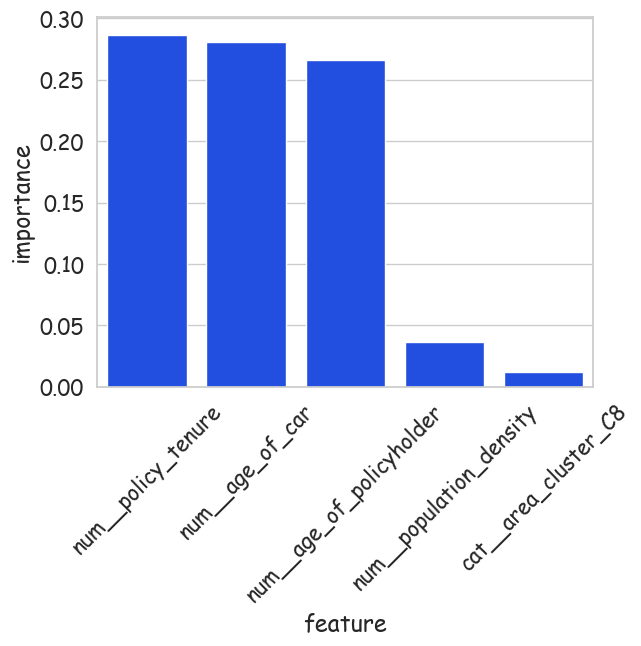

In [180]:
sns.barplot(rank_sorted.head(5), x= 'feature', y = 'importance', orient = 'v')

plt.xticks(rotation=45)

plt.show()

### Observations
Most important features for the insurance company to consider in predicting claim status from customers are -
1. Policy Tenure
2. Age of car
3. Age of policyholder
4. Population Density
5. Area cluster

In [222]:
!pip install jupyter_contrib_nbextensions

In [223]:
!jupyter contrib nbextension install --user

[I 10:29:55 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 10:29:55 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 10:29:55 InstallContribNbextensionsApp] Installing C:\Users\Prashant\anaconda3\Lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 10:29:55 InstallContribNbextensionsApp] Up to date: C:\Users\Prashant\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 10:29:55 InstallContribNbextensionsApp] Up to date: C:\Users\Prashant\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 10:29:55 InstallContribNbextensionsApp] Up to date: C:\Users\Prashant\AppData\Roaming\jupyter\nbextensions\addbefore\main.js
[I 10:29:55 InstallContribNbextensionsApp] Up to date: C:\Users\Prashant\AppData\Roaming\jupyter\nbextensions\addbefore\readme.md
[I 10:29:55 InstallContribNbextensionsApp] - Validating: ok
[I 10:29:55 InstallContribNbextensionsAp

In [225]:
!jupyter nbextension enable varInspector/main

Enabling notebook extension varInspector/main...
      - Validating: ok
